<a href="https://colab.research.google.com/github/antaripg/machine-learning-notebooks/blob/main/Breast_Cancer_Classification_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.
Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [ ]:
from google.colab import drive

drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


### Importing the Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
datapath = '/content/drive/MyDrive/BreastCancer_ML/Breast_Cancer_Kaggle_Data.csv'

In [ ]:
df = pd.read_csv(datapath)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe().T

count          mean  ...           75%           max
id                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01  2.873000e+00
texture_se               569.0  1.216853e+00  ...  1.474000e+00  4.885000e+00
perimeter_se             569.0  2.866059e+00  ...  3.357000e+00  2.198000e+01
area_se                  569.0  4.033708e+01  ...  4.519000e+01  5.422000e+02
smoothness_se            569.0  7.040979e-03  ...  8.146000e-03  3.113000e-02
compactness_se           569.0  2.547814e-02  ...  3.245000e-02  1.354000e-01
concavity_se             569.0  3.189372e-02  ...  4.205000e-02  3.960000e-01
concave points_se        569.0  1.179614e-02  ...  1.471000e-02  5.279000e-02
symmetry_se              569.0  2.054230e-02  ...  2.348000e-02  7.895000e-02
fractal_dimension_se     569.0  3.794904e-03  ...  4.558000e-03  2.984000e-02
radius_worst             569.0  1.626919e+01  ...  1.879000e+01  3.604000e+01
texture_worst            569.0  2.567722e+01  ...  2.972000e+01  4.954000e+01
perimeter_worst          569.0  1.072612e+02  ...  1.254000e+02  2.512000e+02
area_worst               569.0  8.805831e+02  ...  1.084000e+03  4.254000e+03
smoothness_worst         569.0  1.323686e-01  ...  1.460000e-01  2.226000e-01
compactness_worst        569.0  2.542650e-01  ...  3.391000e-01  1.058000e+00
concavity_worst          569.0  2.721885e-01  ...  3.829000e-01  1.252000e+00
concave points_worst     569.0  1.146062e-01  ...  1.614000e-01  2.910000e-01
symmetry_worst           569.0  2.900756e-01  ...  3.179000e-01  6.638000e-01
fractal_dimension_worst  569.0  8.394582e-02  ...  9.208000e-02  2.075000e-01
Unnamed: 32                0.0           NaN  ...           NaN           NaN

[32 rows x 8 columns]

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.rename(columns = {'diagnosis':'Label'})

In [ ]:
df.columns

Index(['id', 'Label', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
sns.countplot(x = "Label", data = df)
plt.show()

In [ ]:
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [ ]:
y = df['Label'].values
y = y.reshape((-1))
y.shape

(569,)

### Converting categorical values into numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y)
Y.shape

(569,)

In [ ]:
np.unique(Y)

array([0, 1])

### Creating our training Data :- X

In [ ]:
X = df.drop(labels = ["Label", "id","Unnamed: 32"], axis = 1)
X.shape

(569, 30)

In [ ]:
g = sns.PairGrid(X)
g.map(sns.scatterplot)

### Normalizing the magnitudes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
#print(scaler.data_max_)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X = scaler.transform(X)

### Splitting the dataset into train,test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 30) (426,) (143, 30) (143,)


### Training the RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Testing the RandomForest Model

In [ ]:
y_pred = model_rf.predict(X_test)
y_pred = (y_pred > 0.5)

### Testing the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{0:.3f}%".format(accuracy * 100))

Accuracy:95.105%


### Printing the confusion matrix

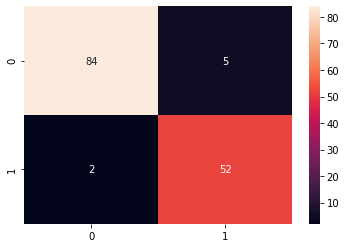

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix in a heatmap form
sns.heatmap(cm, annot=True)
plt.show()

### XGBoost Classifier Training

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Testing the performance of XGBoost

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb = (y_pred_xgb > 0.5)

### Checking the accuracy score for XGboost

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# Accuracy Percentage
print("Accuracy:{0:.3f}%".format(accuracy_xgb* 100))

Accuracy:96.503%


### Confusion Matrix for XGBoost

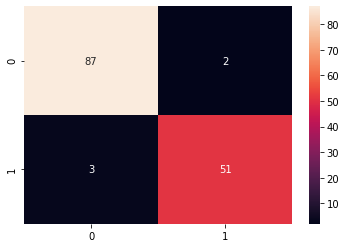

[[87  2]
 [ 3 51]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)
# plotting the heatmap for confusion matrix
sns.heatmap(cm, annot = True)
plt.show()
print(cm)